In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


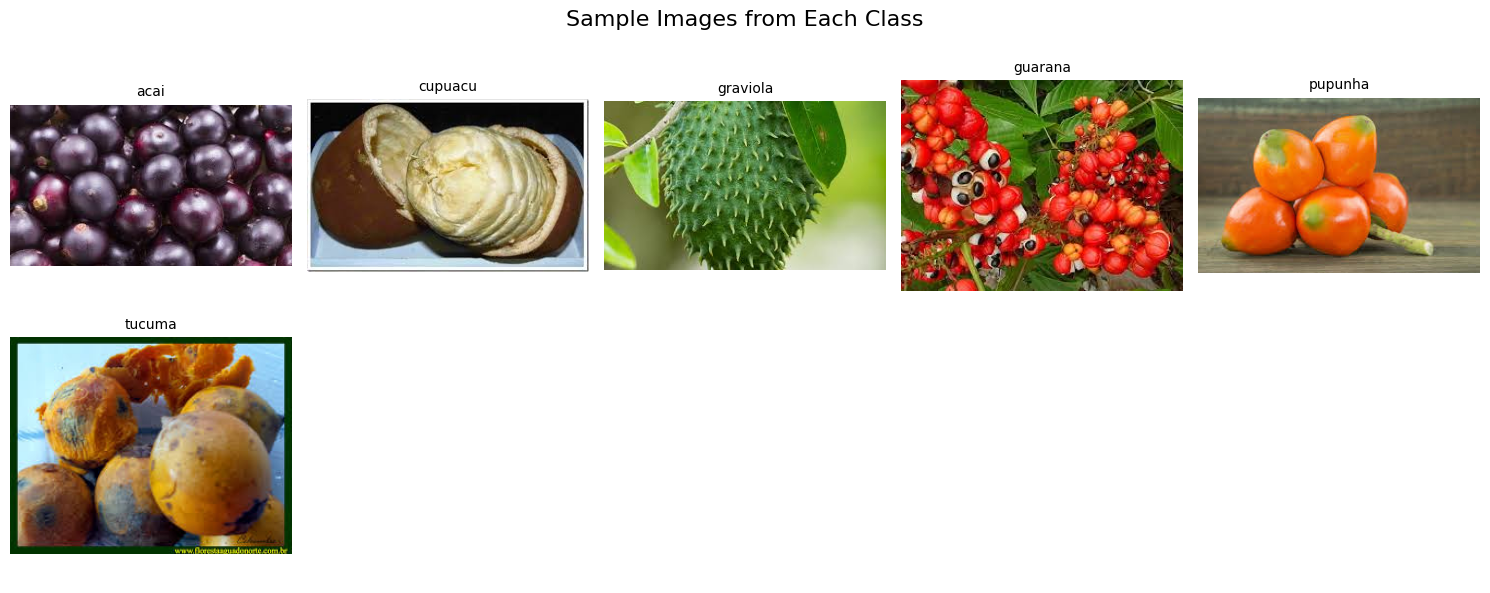

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/AIandML/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


What did you Observe?

Each image represents a different class, confirming correct dataset structure.
Images vary in resolution, lighting, and orientation.
Some classes may have fewer images, indicating dataset imbalance.
Preprocessing (resizing, normalization) may be needed for consistency.

In [ ]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/AIandML/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [ ]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Aaryan Ratna Tuladhar.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 1.0000 - loss: 0.0058
Epoch 1: val_loss improved from inf to 0.36319, saving model to Aaryan Ratna Tuladhar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 548ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.8889 - val_loss: 0.3632
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 1.0000 - loss: 0.0045
Epoch 2: val_loss did not improve from 0.36319
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 513ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.8889 - val_loss: 0.3901
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 1.0000 - loss: 0.0055
Epoch 3: val_loss did not improve from 0.36319
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.8889 - val_loss: 0.3677
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 1.0000 - loss: 0.0044
Epoch 4: val_loss improved from 0.36319 to 0.34543, saving model to Aaryan Ratna Tuladhar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 586ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.8889 - val_loss: 0.3454
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 1.0000 - loss: 0.0028
Epoch 5: val_loss did not improve from 0.34543
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 760ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.8889 - val_loss: 0.3474
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 1.0000 - loss: 0.0024
Epoch 6: val_loss did not improve from 0.34543
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 448ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8889 - val_loss: 0.3600
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 1.0000 - loss: 0.0020
Epoch 7: val_loss did not improve from 0.34543
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8889 - val_loss: 0.3840
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 8: val_loss did not improve from 0.34543
3/3 ━━━━━━━━

In [ ]:
test_dir = '/content/drive/MyDrive/AIandML/FruitinAmazon/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6667 - loss: 225.4794
Test Loss: 225.47935485839844
Test Accuracy: 0.6666666865348816


In [ ]:

model.save('aaryan_ratna_tuladhar.h5')
print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.33      0.80      0.47         5
           2       0.80      0.80      0.80         5
           3       1.00      0.40      0.57         5
           4       0.80      0.80      0.80         5
           5       1.00      0.40      0.57         5

    accuracy                           0.63        30
   macro avg       0.78      0.63      0.65        30
weighted avg       0.78      0.63      0.65        30

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 1.0000 - loss: 0.0031
Epoch 1: val_loss improved from 0.34543 to 0.32734, saving model to Aaryan Ratna Tuladhar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 581ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.8889 - val_loss: 0.3273
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 1.0000 - loss: 0.0028
Epoch 2: val_loss improved from 0.32734 to 0.32347, saving model to Aaryan Ratna Tuladhar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 774ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.8889 - val_loss: 0.3235
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 3: val_loss did not improve from 0.32347
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 440ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.8889 - val_loss: 0.3402
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 1.0000 - loss: 0.0020
Epoch 4: val_loss did not improve from 0.32347
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 439ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8889 - val_loss: 0.3686
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 5: val_loss did not improve from 0.32347
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 422ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.8889 - val_loss: 0.3976
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 6: val_loss did not improve from 0.32347
3/3 ━━━━━━━━

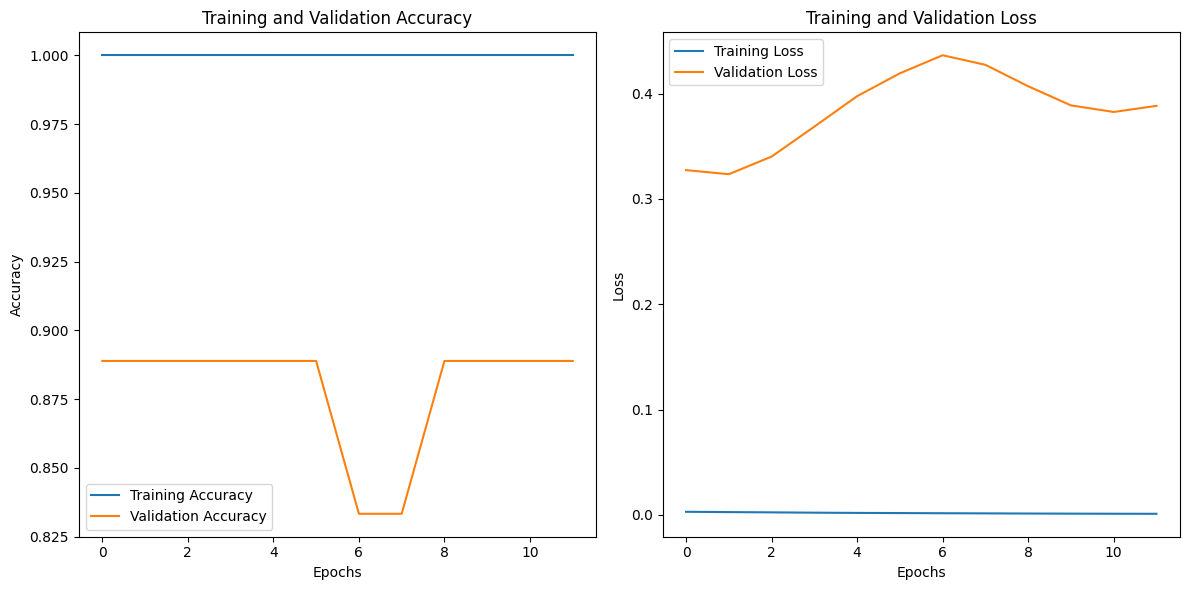

Model saved as 'aaryan_ratna_tuldhar_model.h5'


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('aaryan_ratna_tuldhar_model.h5')
print("Model saved as 'aaryan_ratna_tuldhar_model.h5'")
